In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import *

%matplotlib inline


In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)


In [3]:
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [4]:
df_train.shape

(60000, 785)

In [5]:
28 * 28

784

In [6]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values

In [7]:
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values

In [8]:
X_train.shape

(60000, 784)

In [11]:
X_train[0].reshape((28, 28)).shape

(28, 28)

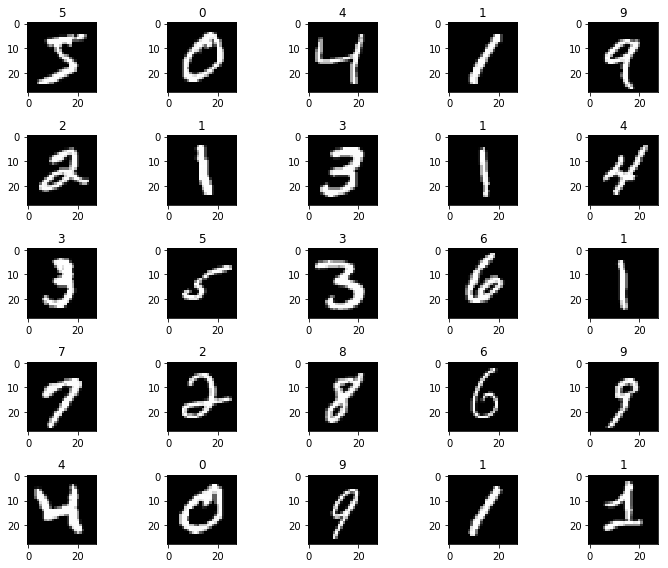

In [17]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

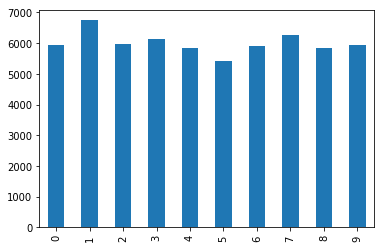

In [19]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

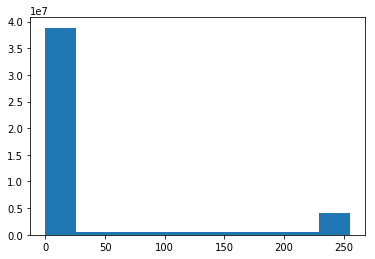

In [23]:
plt.hist(X_train.flatten());

In [24]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     3.331842e+01
std      7.856749e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
dtype: float64

In [25]:
pd.Series(X_test.flatten()).describe()

count    7.840000e+06
mean     3.379122e+01
std      7.917247e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
dtype: float64

In [29]:
a = X_test.flatten()
np.sum(a == 0)/len(a)

0.8072424744897959

In [8]:
X_train = df_train.iloc[:, 1:].values / 255.0
X_test = df_test.iloc[:, 1:].values / 255.0

In [9]:
est = linear_model.SGDClassifier(n_jobs=10, tol=1e-5, eta0 = 0.15, loss="log",
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 200)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.8983 iterations: 134


In [10]:
est

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.15, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='log', max_iter=200,
       n_iter=None, n_iter_no_change=5, n_jobs=10, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
import pickle

In [14]:
with open("/tmp/mnist.pickle", "wb") as f:
    pickle.dump(est, f)

In [15]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
est.n_iter_

100

In [42]:
est.coef_.shape

(10, 784)

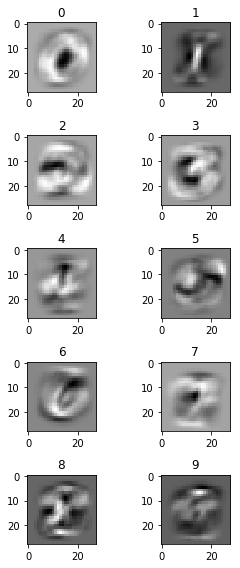

In [50]:
fig, axes = plt.subplots(5, 2, figsize = (4, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(i)
    
plt.tight_layout()

In [47]:
pd.DataFrame(est.coef_[0].reshape((28, 28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.514192e-07,-6.821478e-07,-0.000012,-0.000034,-0.000093,-0.000263,...,-0.000458,-0.000380,-0.000336,-0.000182,-0.000056,-0.000002,0.000000,0.000000,0.000000e+00,0.000000
2,0.000000e+00,0.000000e+00,-0.000002,0.000044,-3.573436e-06,-8.710112e-05,-0.000786,-0.000943,-0.001918,-0.005062,...,-0.028494,-0.023605,-0.015975,-0.007804,-0.003745,-0.001401,-0.000482,-0.000046,0.000000e+00,0.000000
3,0.000000e+00,0.000000e+00,-0.000005,-0.000049,-2.636538e-04,-1.952406e-03,-0.003795,-0.005890,-0.009183,-0.019919,...,-0.084665,-0.069182,-0.049595,-0.031553,-0.017770,-0.006804,-0.002175,-0.000801,-1.570636e-04,0.000000
4,0.000000e+00,-4.309481e-07,-0.000018,-0.000100,-8.786827e-04,-5.747928e-03,-0.011388,-0.019578,-0.030258,-0.044185,...,-0.043255,-0.039862,-0.036552,-0.034166,-0.028235,-0.020239,-0.011975,-0.003696,-5.910231e-04,-0.000012
5,0.000000e+00,0.000000e+00,-0.000161,-0.000279,-3.249677e-03,-1.342094e-02,-0.022888,-0.042228,-0.062094,-0.076451,...,0.034316,0.007314,-0.019318,-0.030885,-0.036940,-0.042934,-0.032522,-0.012439,-2.879235e-03,-0.000355
6,0.000000e+00,-7.189175e-07,-0.000169,-0.001032,-7.050215e-03,-1.790962e-02,-0.034196,-0.057121,-0.078876,-0.088698,...,0.087475,0.048524,0.012298,0.000926,-0.020397,-0.051530,-0.056781,-0.028145,-8.017160e-03,-0.001249
7,-3.487662e-07,-8.483838e-05,-0.000864,-0.002960,-1.394178e-02,-2.577916e-02,-0.044493,-0.066762,-0.078801,-0.054048,...,0.116359,0.067349,0.022799,0.000620,-0.010506,-0.042219,-0.067002,-0.039848,-1.040473e-02,-0.000422
8,3.269614e-04,-1.856083e-04,-0.001959,-0.007892,-2.424347e-02,-4.127381e-02,-0.054896,-0.067541,-0.060948,-0.040459,...,0.110796,0.076766,0.045849,0.016022,0.013860,-0.007830,-0.056622,-0.041386,-9.765043e-03,-0.000643
9,-1.716989e-05,-4.049271e-04,-0.003130,-0.012196,-3.096530e-02,-4.711994e-02,-0.053575,-0.052379,-0.043424,-0.025647,...,0.109360,0.102333,0.076853,0.054701,0.059072,0.044895,-0.023104,-0.031915,-7.833134e-03,-0.000371


In [51]:
import keras

Using TensorFlow backend.


In [54]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (784,)),
    keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = "sgd", metrics = ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [57]:
y_train[:5]

array([5, 0, 4, 1, 9])

In [58]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
pd.DataFrame(Y_train)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
model.fit(X_train, Y_train, epochs=10, 
          validation_data=(X_test, Y_test), batch_size=32, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3175 - acc: 0.9111 - val_loss: 0.3036 - val_acc: 0.9160
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3139 - acc: 0.9124 - val_loss: 0.3008 - val_acc: 0.9148
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3107 - acc: 0.9133 - val_loss: 0.2987 - val_acc: 0.9160
Epoch 4/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3078 - acc: 0.9146 - val_loss: 0.2969 - val_acc: 0.9164
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3052 - acc: 0.9145 - val_loss: 0.2944 - val_acc: 0.9173
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3029 - acc: 0.9155 - val_loss: 0.2929 - val_acc: 0.9172
Epoch 7/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3007 - acc: 0.9160 - val_loss: 0.2915 - val_acc

In [60]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 13us/step


[0.3063204320669174, 0.9143]

In [100]:
from time import time

In [103]:
tensorboard = keras.callbacks.TensorBoard("/tmp/tf-logs/%d" % time())
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (784,)),
    keras.layers.Dense(units = 400, activation = "relu"),
    keras.layers.Dense(units = 100, activation = "relu"),
    keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = "sgd", metrics = ["accuracy"]
              )

model.summary()

model.fit(X_train, Y_train, epochs=10, 
          validation_data=(X_test, Y_test), batch_size=32, verbose=1, callbacks = [tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.5928 - acc: 0.8483 - val_loss: 0.3016 - val_acc: 0.9147
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2776 - acc: 0.9214 - val_loss: 0.2401 - val_acc: 0.9355
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - los

In [65]:
y_test_pred = model.predict_classes(X_test)

In [68]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
result["error"] = result.actual != result.predicted

In [69]:
result.sample(10)

,actual,predicted,error
864,8,8,False
6534,2,2,False
941,7,7,False
3658,2,2,False
3781,8,8,False
1735,4,4,False
2226,0,0,False
81,6,6,False
190,1,1,False
4538,1,1,False


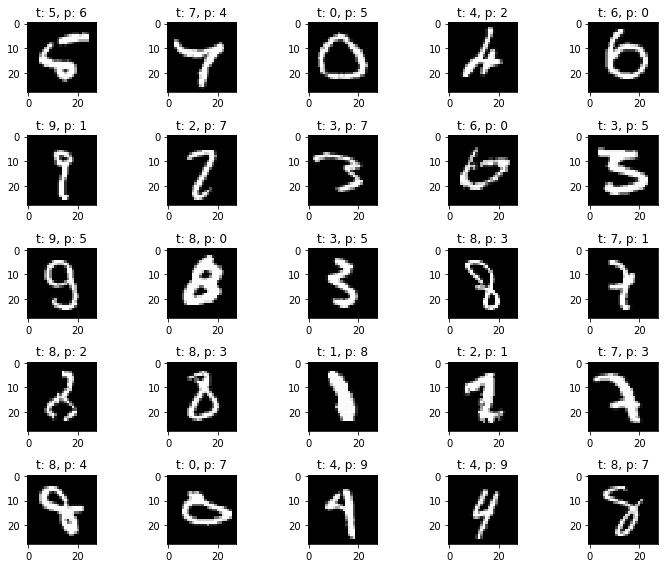

In [74]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[result.error][i].reshape((28, 28)), cmap = "gray")
    ax.set_title("t: %d, p: %d" % (y_test[result.error][i],y_test_pred[result.error][i]))
    
plt.tight_layout()

In [75]:
result[result.error].shape

(314, 3)

In [87]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights[0].shape, weights[1].shape)

(784, 400) (400,)
(400, 100) (100,)
(100, 10) (10,)


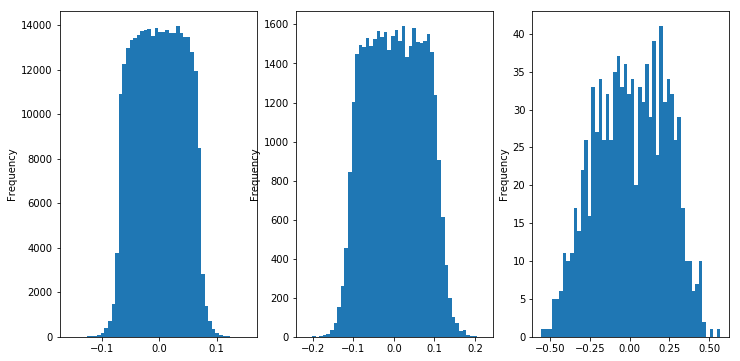

In [93]:
fig, axes = plt.subplots(1, 3, figsize = (12, 6))
for i, ax in enumerate(fig.axes):
    pd.Series(model.layers[i].get_weights()[0].flatten()).plot.hist(bins = 50, ax = ax)

In [97]:
import tensorflow as tf

In [98]:
tf.__version__

'1.13.1'

In [99]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (784,)),
    keras.layers.Dense(units = 400, activation = "sigmoid"),
    keras.layers.Dense(units = 100, activation = "sigmoid"),
    keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = "sgd", metrics = ["accuracy"])

model.summary()

model.fit(X_train, Y_train, epochs=10, 
          validation_data=(X_test, Y_test), batch_size=32, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/step - loss: 2.1278 - acc: 0.4270 - val_loss: 1.8475 - val_acc: 0.6006
Epoch 2/10
60000/60000 [==============================] - 5s 80us/step - loss: 1.4266 - acc: 0.7044 - val_loss: 1.0394 - val_acc: 0.7679
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - los

In [106]:
X_train_3d = X_train.reshape((-1, 28, 28, 1))
X_test_3d = X_test.reshape((-1, 28, 28, 1))
X_train_3d.shape

(60000, 28, 28, 1)

In [107]:
tensorboard = keras.callbacks.TensorBoard("/tmp/tf-logs/%d" % time())
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (28,28, 1)),
    
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu" ),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units = 400, activation = "relu"),
    keras.layers.Dense(units = 100, activation = "relu"),
    keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = keras.losses.categorical_crossentropy
              , optimizer = "adam", metrics = ["accuracy"]
              )

model.summary()

model.fit(X_train_3d, Y_train, epochs=10, 
          validation_data=(X_test_3d, Y_test), batch_size=32, verbose=1, callbacks = [tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 400)               640400    
_________________________________________________________________
dense_29 (Dense)             (None, 100)               40100     
__________

In [108]:
y_test_pred = model.predict_classes(X_test_3d)

In [110]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
result["error"] = result.actual != result.predicted

In [112]:
result[result.error].shape

(96, 3)

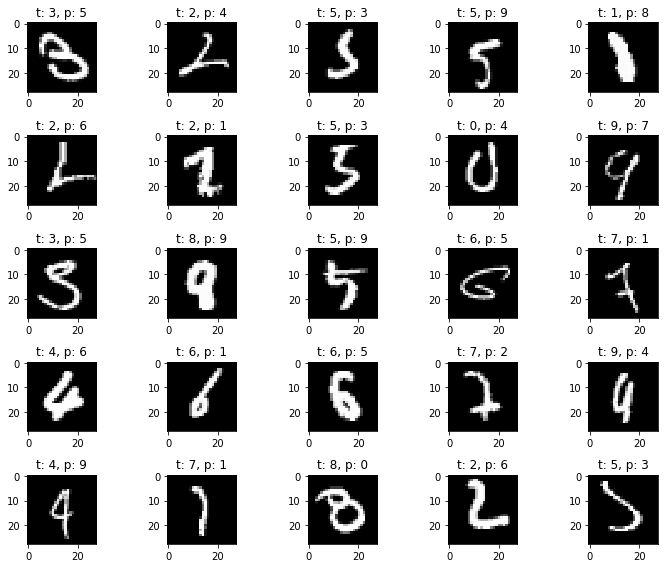

In [111]:
fig, axes = plt.subplots(5, 5, figsize = (10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[result.error][i].reshape((28, 28)), cmap = "gray")
    ax.set_title("t: %d, p: %d" % (y_test[result.error][i],y_test_pred[result.error][i]))
    
plt.tight_layout()

In [119]:
tensorboard = keras.callbacks.TensorBoard("/tmp/tf-logs/%d" % time())
model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (28,28, 1)),
    
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "SAME"),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    keras.layers.Dropout(rate = 0.5),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (5, 5), activation = "relu", padding = "SAME"),
    keras.layers.MaxPool2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(rate = 0.5),
    
    keras.layers.Dense(units = 400, activation = "relu"),
    keras.layers.Dense(units = 100, activation = "relu"),
    keras.layers.Dense(units = 10, activation = "softmax")
])

model.compile(loss = keras.losses.categorical_crossentropy
              , optimizer = "adam", metrics = ["accuracy"]
              )

model.summary()

model.fit(X_train_3d, Y_train, epochs=10, 
          validation_data=(X_test_3d, Y_test), batch_size=32, verbose=1, callbacks = [tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 3136)              0         
__________

KeyboardInterrupt: 

In [16]:
from skimage.io import imread


In [24]:
a = imread("/Users/abasar/Downloads/4.jpg")
a = a[2:,:,:]

In [25]:
a.shape

(36, 36, 3)

In [26]:
a.shape

(36, 36, 3)

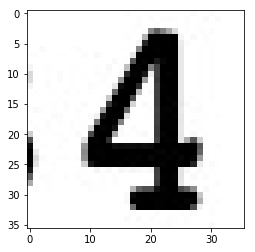

In [28]:
plt.imshow(a)

In [29]:
import skimage

In [45]:
a2 = skimage.color.rgb2gray(a)
a2.shape

(36, 36)

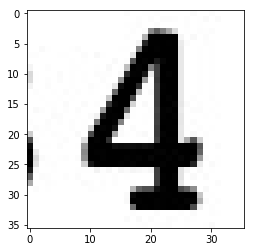

In [46]:
plt.imshow(a2, cmap = "gray")

In [47]:
a2.shape

(36, 36)

In [49]:
a3 = a2[4:-4, 4:-4]
a3.shape

(28, 28)

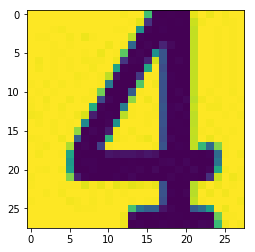

In [51]:
plt.imshow(a3)

In [52]:
a3

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99215686, 1.        , 1.        ,
        0.69803922, 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.96470588, 1.        , 0.97647059, 1.        ,
        0.98823529, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99607843, 0.96078431,
        0.14901961, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.        , 0.92156863, 0.98823529, 1.        , 1.        ,
        0.99215686, 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 0.99607843, 0.98823529,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99607843, 0.99607843, 1.        , 0.51372549,
        0.01176471, 0.    

In [53]:
a4 = np.array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99215686, 1.        , 1.        ,
        0.69803922, 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.96470588, 1.        , 0.97647059, 1.        ,
        0.98823529, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99607843, 0.96078431,
        0.14901961, 0.00392157, 0.00392157, 0.        , 0.00392157,
        0.        , 0.92156863, 0.98823529, 1.        , 1.        ,
        0.99215686, 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 0.99607843, 0.98823529,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99607843, 0.99607843, 1.        , 0.51372549,
        0.01176471, 0.        , 0.00784314, 0.        , 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 0.99607843, 0.99607843, 1.        , 1.        ,
        0.98823529, 1.        , 0.97647059, 0.99607843, 1.        ,
        1.        , 1.        , 1.        , 0.90196078, 0.00784314,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 0.99607843, 1.        ,
        0.99607843, 1.        , 1.        , 1.        , 1.        ,
        0.98039216, 1.        , 0.99215686, 0.3372549 , 0.        ,
        0.01176471, 0.        , 0.09803922, 0.02352941, 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 0.99607843, 0.99607843,
        1.        , 1.        , 0.99607843, 1.        , 0.97647059,
        1.        , 0.99607843, 0.74901961, 0.00392157, 0.01176471,
        0.        , 0.50196078, 0.25882353, 0.        , 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 0.98431373, 1.        , 0.99607843, 1.        ,
        0.99607843, 1.        , 0.98823529, 0.99215686, 0.99215686,
        1.        , 0.97647059, 0.15686275, 0.01176471, 0.00784314,
        0.09411765, 0.93333333, 0.25882353, 0.        , 0.01176471,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 0.98823529, 1.        , 0.99607843, 1.        ,
        0.99607843, 1.        , 1.        , 0.98823529, 1.        ,
        1.        , 0.58039216, 0.00784314, 0.        , 0.        ,
        0.60784314, 1.        , 0.23137255, 0.        , 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 0.99607843, 1.        ,
        1.        , 0.98823529, 0.99607843, 1.        , 0.99215686,
        0.90196078, 0.05098039, 0.        , 0.        , 0.16470588,
        0.99215686, 0.99607843, 0.25882353, 0.00784314, 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [0.99607843, 1.        , 0.98823529, 1.        , 0.99215686,
        1.        , 0.99607843, 1.        , 1.        , 0.99607843,
        0.41568627, 0.        , 0.        , 0.        , 0.72941176,
        1.        , 0.98431373, 0.25098039, 0.00392157, 0.        ,
        0.        , 0.90980392, 1.        , 1.        , 0.99607843,
        1.        , 0.99607843, 1.        ],
       [1.        , 0.99607843, 1.        , 0.99607843, 1.        ,
        1.        , 1.        , 1.        , 0.99215686, 0.78823529,
        0.        , 0.        , 0.        , 0.29019608, 0.99607843,
        1.        , 1.        , 0.25098039, 0.        , 0.01176471,
        0.        , 0.90980392, 1.        , 0.99215686, 1.        ,
        1.        , 0.99215686, 1.        ],
       [0.99607843, 1.        , 0.98431373, 1.        , 1.        ,
        0.98431373, 1.        , 0.99215686, 0.99607843, 0.22352941,
        0.01568627, 0.        , 0.        , 0.83529412, 1.        ,
        0.98039216, 1.        , 0.24705882, 0.        , 0.        ,
        0.01960784, 0.89803922, 0.98431373, 1.        , 0.99215686,
        1.        , 1.        , 0.99607843],
       [0.99215686, 1.        , 0.99215686, 1.        , 0.98823529,
        1.        , 1.        , 1.        , 0.61568627, 0.01176471,
        0.        , 0.        , 0.41960784, 0.99607843, 1.        ,
        1.        , 0.99215686, 0.26666667, 0.00784314, 0.01568627,
        0.        , 0.91764706, 1.        , 0.98823529, 0.98823529,
        1.        , 0.99607843, 1.        ],
       [0.98431373, 0.98823529, 1.        , 1.        , 0.99607843,
        1.        , 0.98431373, 0.94509804, 0.08235294, 0.00392157,
        0.00784314, 0.00392157, 0.89803922, 0.99607843, 1.        ,
        0.99607843, 0.99607843, 0.25098039, 0.00784314, 0.        ,
        0.00784314, 0.90196078, 1.        , 1.        , 1.        ,
        0.99607843, 1.        , 0.99215686],
       [1.        , 0.99215686, 1.        , 0.99215686, 1.        ,
        0.99607843, 1.        , 0.4745098 , 0.        , 0.        ,
        0.01176471, 0.50980392, 1.        , 1.        , 1.        ,
        0.99607843, 1.        , 0.25490196, 0.00392157, 0.00392157,
        0.        , 0.90196078, 1.        , 0.98823529, 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.99215686, 1.        ,
        0.99607843, 0.83529412, 0.        , 0.01568627, 0.00392157,
        0.07058824, 0.98039216, 1.        , 0.98823529, 1.        ,
        1.        , 1.        , 0.23921569, 0.        , 0.00392157,
        0.00392157, 0.90980392, 0.99607843, 1.        , 0.99215686,
        1.        , 0.99607843, 1.        ],
       [0.99215686, 0.99607843, 1.        , 1.        , 0.98039216,
        1.        , 0.29411765, 0.00784314, 0.        , 0.00392157,
        0.65098039, 0.98431373, 0.99607843, 1.        , 0.98823529,
        0.97647059, 1.        , 0.23137255, 0.01568627, 0.        ,
        0.        , 0.90588235, 1.        , 0.97647059, 1.        ,
        0.99215686, 1.        , 1.        ],
       [1.        , 0.99607843, 0.98823529, 1.        , 1.        ,
        0.8745098 , 0.        , 0.01176471, 0.        , 0.19215686,
        0.99215686, 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98823529, 0.25882353, 0.        , 0.00784314,
        0.00392157, 0.90588235, 0.66666667, 0.3372549 , 0.81568627,
        0.99607843, 1.        , 1.        ],
       [1.        , 0.98823529, 1.        , 1.        , 0.99607843,
        0.58823529, 0.00392157, 0.        , 0.        , 0.        ,
        0.05490196, 0.04313725, 0.05098039, 0.05098039, 0.03921569,
        0.05882353, 0.04313725, 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.00784314, 0.34509804,
        0.99607843, 1.        , 0.98823529],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.5372549 , 0.        , 0.00784314, 0.00784314, 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.01176471, 0.01568627, 0.        ,
        0.01568627, 0.        , 0.        , 0.        , 0.39215686,
        1.        , 1.        , 1.        ],
       [1.        , 0.99607843, 0.99215686, 1.        , 0.98823529,
        0.56470588, 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.00784314, 0.00392157, 0.01176471,
        0.        , 0.02352941, 0.        , 0.        , 0.01176471,
        0.        , 0.01960784, 0.        , 0.01568627, 0.60392157,
        0.98823529, 1.        , 0.99607843],
       [0.99215686, 1.        , 1.        , 1.        , 1.        ,
        0.81176471, 0.08627451, 0.00784314, 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.01568627, 0.        ,
        0.        , 0.        , 0.        , 0.01176471, 0.        ,
        0.00392157, 0.00392157, 0.        , 0.1372549 , 0.92156863,
        1.        , 0.98039216, 0.99607843],
       [0.99607843, 1.        , 1.        , 1.        , 0.99607843,
        0.99607843, 0.99607843, 0.95686275, 0.99215686, 0.97254902,
        1.        , 0.96470588, 0.98039216, 0.96078431, 0.97254902,
        0.98431373, 0.96862745, 0.25098039, 0.        , 0.        ,
        0.        , 0.89411765, 0.97254902, 1.        , 0.98039216,
        1.        , 0.99607843, 1.        ],
       [1.        , 1.        , 0.99215686, 1.        , 0.98823529,
        1.        , 1.        , 1.        , 0.99607843, 1.        ,
        0.99215686, 1.        , 0.99607843, 1.        , 1.        ,
        1.        , 1.        , 0.25490196, 0.00784314, 0.        ,
        0.01176471, 0.89411765, 1.        , 0.98039216, 1.        ,
        0.98431373, 1.        , 1.        ],
       [0.99607843, 1.        , 1.        , 1.        , 1.        ,
        0.98431373, 0.99215686, 1.        , 0.99215686, 1.        ,
        0.99215686, 1.        , 1.        , 0.99607843, 1.        ,
        0.99607843, 0.99215686, 0.23529412, 0.        , 0.        ,
        0.        , 0.90980392, 0.99607843, 1.        , 1.        ,
        1.        , 1.        , 0.98823529],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.99215686, 0.99607843, 0.99607843, 1.        ,
        1.        , 1.        , 1.        , 0.70980392, 0.38039216,
        0.30980392, 0.30980392, 0.05490196, 0.01176471, 0.        ,
        0.        , 0.28627451, 0.36470588, 0.55686275, 1.        ,
        0.97647059, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.98039216, 0.03921569, 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.00392157,
        0.        , 0.00392157, 0.        , 0.        , 0.77647059,
        0.99607843, 0.99607843, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.97647059, 0.00392157, 0.00784314,
        0.        , 0.        , 0.00784314, 0.00392157, 0.        ,
        0.00784314, 0.        , 0.01568627, 0.01176471, 0.68235294,
        0.98431373, 1.        , 0.99215686]])

In [54]:
a4.shape

(28, 28)